In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df =pd.read_csv("customer_analayiss_case_study_with_response.csv")
df

,Unnamed: 0,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response
0,0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No
1,1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No
2,2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No
3,3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes
4,4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No
10906,10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No
10907,10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No
10908,10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No



- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [44]:
#Using StandardScaler()
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_scaled = std_scaler.transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

In [50]:
# Using MinMaxScaler()
min_max_scl = MinMaxScaler()
min_max_scl.fit(x_train)
x_train_minmax = min_max_scl.transform(x_train)
x_test_minmax = min_max_scl.transform(x_test)

In [3]:
#Number of responses
response =df['response'].value_counts()
response

No     8813
Yes    1466
Name: response, dtype: int64

<BarContainer object of 2 artists>

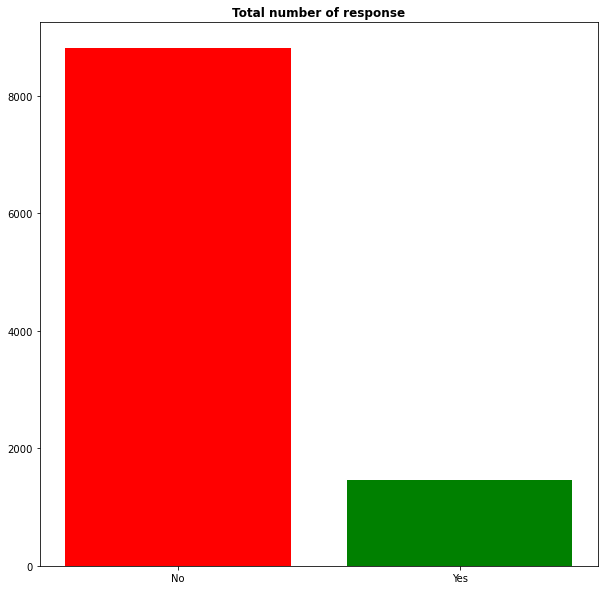

In [4]:
fig1, response_plot = plt.subplots(figsize = (10,10))

response_plot.set_title('Total number of response', fontweight='bold')

# plot the bar chart
response_plot.bar(response.index, response, color=('red','green'))

In [5]:
#Show a plot of the response rate by the sales channel
channel = df['sales channel'].value_counts()
channel

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales channel, dtype: int64

In [6]:
response_channel = df.groupby(['response','sales channel'])['gender'].count().rename('count').reset_index()
response_channel

,response,sales channel,count
0,No,Agent,3148
1,No,Branch,2539
2,No,Call Center,1792
3,No,Web,1334
4,Yes,Agent,742
5,Yes,Branch,326
6,Yes,Call Center,221
7,Yes,Web,177


<AxesSubplot:title={'center':'Response Rate by Sales Channel'}, xlabel='sales channel', ylabel='count'>

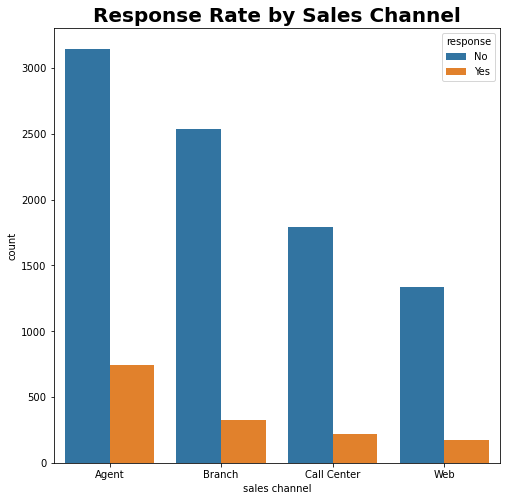

In [7]:
fig2, pt2 = plt.subplots(figsize = (8,8))
pt2.set_title('Response Rate by Sales Channel', size='20', fontweight='bold')

sns.barplot(hue = response_channel['response'], y=response_channel['count'], x = response_channel['sales channel'])

<AxesSubplot:title={'center':'Response Rate by total claim'}, xlabel='response', ylabel='total claim amount'>

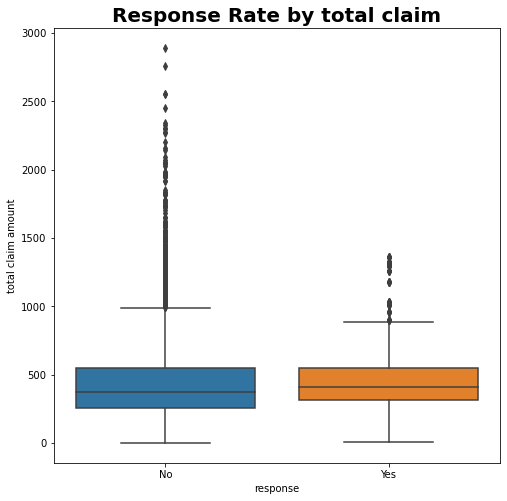

In [8]:
#Show a plot of the response rate by the total claim amount.
fig3, pt3= plt.subplots(figsize = (8,8))
pt3.set_title('Response Rate by total claim', size='20', fontweight='bold')

sns.boxplot(y=df['total claim amount'], x = df['response'])

In [9]:
#Show a plot of the response rate by income.

pd.cut(df['income'],4)

0        (24995.25, 49990.5]
1        (-99.981, 24995.25]
2        (-99.981, 24995.25]
3        (24995.25, 49990.5]
4        (-99.981, 24995.25]
                ...         
10905    (-99.981, 24995.25]
10906    (49990.5, 74985.75]
10907    (24995.25, 49990.5]
10908    (49990.5, 74985.75]
10909    (-99.981, 24995.25]
Name: income, Length: 10910, dtype: category
Categories (4, interval[float64]): [(-99.981, 24995.25] < (24995.25, 49990.5] < (49990.5, 74985.75] < (74985.75, 99981.0]]

In [10]:
income_labels = ['Low', 'Moderate', 'High', 'Very High']
df['income_range'] = pd.cut(df['income'],4, labels=income_labels)

In [11]:
response_income = df.groupby(['response','income_range'])['gender'].count().rename('count').reset_index()
response_income

,response,income_range,count
0,No,Low,3435
1,No,Moderate,2225
2,No,High,1835
3,No,Very High,1318
4,Yes,Low,558
5,Yes,Moderate,390
6,Yes,High,335
7,Yes,Very High,183


<AxesSubplot:title={'center':'Response Rate by Income'}, xlabel='income_range', ylabel='count'>

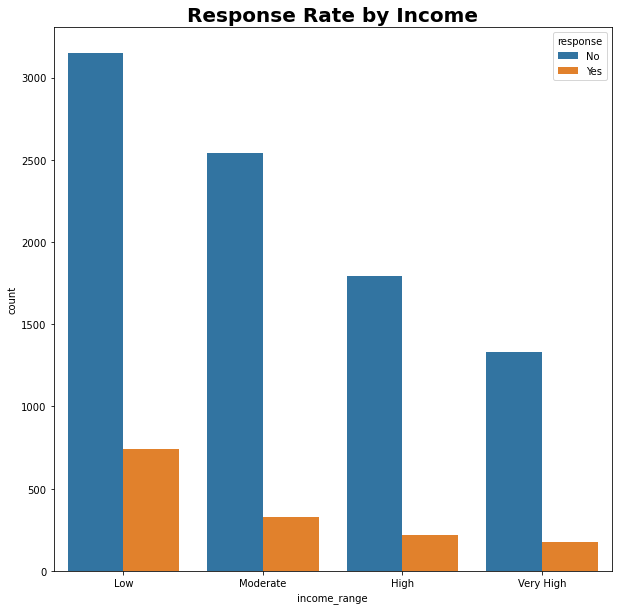

In [12]:
fig4, pt4 = plt.subplots(figsize = (10,10))
pt4.set_title('Response Rate by Income', size='20', fontweight='bold')

sns.barplot(hue = response_income['response'], y=response_channel['count'], x = response_income['income_range'])

<AxesSubplot:>

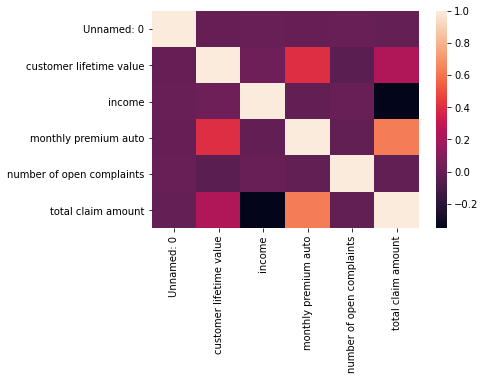

In [13]:
#Plot the Correlation Heatmap
sns.heatmap(df.corr())

In [14]:
df.corr()

,Unnamed: 0,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
Unnamed: 0,1.000000,0.001355,0.008910,0.000863,0.007325,-0.000593
customer lifetime value,0.001355,1.000000,0.028306,0.403069,-0.032243,0.232626
income,0.008910,0.028306,1.000000,-0.009788,0.007163,-0.354141
monthly premium auto,0.000863,0.403069,-0.009788,1.000000,-0.010350,0.631799
number of open complaints,0.007325,-0.032243,0.007163,-0.010350,1.000000,-0.011379
total claim amount,-0.000593,0.232626,-0.354141,0.631799,-0.011379,1.000000


activity 5
- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features



#Activity 6

-X-y split

-Normalize (numerical).

-One Hot/Label Encoding (categorical).

In [15]:
df= df.drop("Unnamed: 0", axis = 1)
df

,state,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,total claim amount,vehicle class,sales channel,response,income_range
0,Arizona,4809.216960,College,M,48029,61,0.0,Corporate Auto,292.800000,Four-Door Car,Agent,No,Moderate
1,California,2228.525238,College,F,0,64,0.0,Personal Auto,744.924331,Four-Door Car,Call Center,No,Low
2,Washington,14947.917300,Bachelor,M,22139,100,0.0,Personal Auto,480.000000,SUV,Call Center,No,Low
3,Oregon,22332.439460,College,M,49078,97,0.0,Corporate Auto,484.013411,Four-Door Car,Branch,Yes,Moderate
4,Oregon,9025.067525,Bachelor,F,23675,117,NaN,Personal Auto,707.925645,Four-Door Car,Branch,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,Bachelor,F,0,253,NaN,Personal Auto,1214.400000,Luxury Car,Web,No,Low
10906,Oregon,5259.444853,College,F,61146,65,0.0,Personal Auto,273.018929,Four-Door Car,Branch,No,High
10907,Arizona,23893.304100,Bachelor,F,39837,201,0.0,Corporate Auto,381.306996,Luxury SUV,Web,No,Moderate
10908,California,11971.977650,College,F,64195,158,4.0,Personal Auto,618.288849,SUV,Branch,No,High


In [16]:
df= df.rename(columns={'total claim amount':'total_claim_amount','customer lifetime value':'clv','monthly premium auto':'mpa','number of open complaints':'number_of_complaints'})

In [17]:
x=df._get_numeric_data().fillna(0)

In [18]:
y= df.total_claim_amount

In [19]:
x_scaled=StandardScaler().fit_transform(x)
x_scaled.shape

(10910, 5)

In [20]:
x_scaled

array([[-0.46610505,  0.34563485, -0.93481904, -0.4066559 , -0.48632546],
       [-0.84094593, -1.23646244, -0.84771343, -0.4066559 ,  1.06115963],
       [ 1.00652314, -0.50719362,  0.19755381, -0.4066559 ,  0.15440363],
       ...,
       [ 2.30582467,  0.07578661,  3.13010912, -0.4066559 , -0.18339273],
       [ 0.5742732 ,  0.87815031,  1.88159547,  4.08725734,  0.62772461],
       [-0.16859268, -1.23646244,  0.22658901, -0.4066559 ,  2.00854558]])

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=.20)

In [22]:
x_train

array([[-0.32463928,  1.14691151, -0.58639662, -0.4066559 , -1.44074485],
       [ 0.93212066,  0.76895269,  0.74922263, -0.4066559 , -1.11231425],
       [ 2.767161  , -0.48031421, -0.0347278 ,  2.96377903,  0.02297202],
       ...,
       [ 0.09046139, -0.50541484, -0.55736142, -0.4066559 , -0.06623813],
       [ 2.83909413, -0.36650492, -0.063763  , -0.4066559 , -0.85694825],
       [-0.6134234 , -0.584439  ,  0.34272981, -0.4066559 ,  0.23654838]])

In [23]:
y_train

395        13.949992
8056      109.906628
4166      441.600000
9123      504.000000
4921       91.417923
            ...     
6565     1339.303486
10390     199.238760
7176      415.535724
1602      184.516188
6948      504.000000
Name: total_claim_amount, Length: 8728, dtype: float64

In [24]:
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.898e+32
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:17:33   Log-Likelihood:             2.3549e+05
No. Observations:                8728   AIC:                        -4.710e+05
Df Residuals:                    8722   BIC:                        -4.709e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        434.8883   4.96e-15   8.76e+16      0.0

normalize (numerical)

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size= .5)

In [26]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.coef_

array([-1.01421665e-13, -1.85146607e-13,  2.99936520e-13,  1.16444907e-14,
        2.92167165e+02])

In [28]:
y_pred=model.predict(x_test)
y_pred

array([365.364581, 940.8     , 460.8     , ..., 321.060571, 380.560266,
       206.818326])

In [29]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
10737,365.364581,365.364581
9976,940.800000,940.800000
10688,460.800000,460.800000
2618,441.600000,441.600000
267,302.400000,302.400000
...,...,...
7596,331.200000,331.200000
4354,552.000000,552.000000
180,321.060571,321.060571
2963,380.560266,380.560266


Text(0.5, 1.0, 'Test Set Residual histogram')

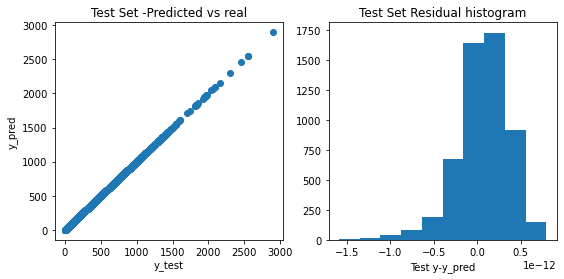

In [30]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

In [31]:
y_test

10737    365.364581
9976     940.800000
10688    460.800000
2618     441.600000
267      302.400000
            ...    
7596     331.200000
4354     552.000000
180      321.060571
2963     380.560266
2875     206.818326
Name: total_claim_amount, Length: 5455, dtype: float64

In [32]:
y_pred

array([365.364581, 940.8     , 460.8     , ..., 321.060571, 380.560266,
       206.818326])

WEEK 7

Instructions

- In this lab, we will model our data. Import sklearn train_test_split and separate the data.
- Try a simple linear regression with all the data to see whether we are getting good results.
- Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
- Use the function to check LinearRegressor,Lasso,Ridge and KNeighborsRegressor.
- Use feature selection techniques to select subset of features to train the model with(if necessary).
- Check and discuss the results.

In [37]:
models = {
    'Linear regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'KNN-Regression': KNeighborsRegressor(n_neighbors=5)
}

In [41]:
def apply_model(models):
    
    r2_scores = dict()
    
    for model_name, model in models.items():
        model.fit(x_train_scaled, y_train)
        y_hat = model.predict(x_test_scaled)
        r2_scores[model_name] = r2_score(y_test, y_hat)
        
    return r2_scores

In [42]:
def apply_model2(models):
    
    r2_scores = dict()
    
    for model_name, model in models.items():
        model.fit(x_train_minmax, y_train)
        y_hat = model.predict(x_test_minmax)
        r2_scores[model_name] = r2_score(y_test, y_hat)
        
    return r2_scores

In [47]:
apply_model(models)

{'Linear regression': 1.0,
 'Lasso': 0.9999998861576429,
 'Ridge': 0.9999999230461931,
 'KNN-Regression': 0.9799459058620031}

In [51]:
apply_model2(models)

{'Linear regression': 1.0,
 'Lasso': 0.9999901364926608,
 'Ridge': 0.9994691166702347,
 'KNN-Regression': 0.9587562577489056}

In [54]:
selector = RFE(LinearRegression(), n_features_to_select=6, step=1)
selector.fit(x_train_scaled, y_train)
        
columns = x.columns[selector.support_]
columns

Index(['clv', 'income', 'mpa', 'number_of_complaints', 'total_claim_amount'], dtype='object')

In [56]:
selector = RFE(LinearRegression(), n_features_to_select=6, step=1)
selector.fit(x_train_minmax, y_train)
        
columns = x.columns[selector.support_]
columns

Index(['clv', 'income', 'mpa', 'number_of_complaints', 'total_claim_amount'], dtype='object')

In [57]:
selector = RFE(LinearRegression(), n_features_to_select=6, step=1)
selector.fit(x_train_scaled, y_train)
        
columns = x.columns[selector.support_]
columns

Index(['clv', 'income', 'mpa', 'number_of_complaints', 'total_claim_amount'], dtype='object')